In [1]:
import mplstereonet
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_csv('403info.csv')
df

,dips_one,dip_directions_one,persistances_one,dips_two,dip_directions_two,persistances_two,dips_three,dip_directions_three,persistances_three,dips_four,dip_directions_four,persistances_four
0,80.0,50.0,8.0,85.0,315.0,8.00,75.0,286.0,2.0,35,180,2.85
1,70.0,60.0,8.0,90.0,70.0,1.27,60.0,184.0,2.5,85,335,8.00
2,75.0,272.0,2.5,90.0,30.0,1.48,65.0,18.0,3.0,85,170,1.42
3,45.0,196.0,0.9,90.0,125.0,2.25,70.0,44.0,2.5,80,140,8.00
4,80.0,220.0,1.8,80.0,320.0,7.50,65.0,180.0,2.0,90,150,1.70
5,70.0,210.0,2.0,85.0,100.0,1.02,85.0,60.0,5.0,55,10,2.14
6,80.0,264.0,2.5,85.0,95.0,4.00,85.0,60.0,7.0,55,5,1.50
7,75.0,274.0,5.0,75.0,95.0,8.00,80.0,90.0,6.0,80,265,8.00
8,85.0,14.0,2.5,85.0,300.0,8.00,85.0,340.0,3.0,90,260,6.50
9,90.0,22.0,1.0,85.0,95.0,4.00,80.0,40.0,6.0,45,50,2.10


In [3]:
dip_directions_one = [i[0] for i in df.iloc[0:29,1:2].values]
dip_directions_two = [i[0] for i in df.iloc[0:47,4:5].values]
dip_directions_three = [i[0] for i in df.iloc[0:30,7:8].values]
dip_directions_four = [i[0] for i in df.iloc[0:55,10:11].values]
dip_directions_combined = dip_directions_one + dip_directions_two + dip_directions_three + dip_directions_four

dips_one = [i[0] for i in df.iloc[0:29,0:1].values]
dips_two = [i[0] for i in df.iloc[0:47,3:4].values]
dips_three=[i[0] for i in df.iloc[0:30,6:7].values]
dips_four=[i[0] for i in df.iloc[0:55,9:10].values]
dips_combined = dips_one + dips_two + dips_three + dips_four

persistances_one = [i[0] for i in df.iloc[0:29,2:3].values]
persistances_two = [i[0] for i in df.iloc[0:47,5:6].values]
persistances_three = [i[0] for i in df.iloc[0:30,8:9].values]
persistances_four = [i[0] for i in df.iloc[0:55,11:12].values]
persistances_combined = persistances_one + persistances_two + persistances_three + persistances_four
len(persistances_combined)

161

In [4]:
def dip_direction_to_strike(dip_direction):
    strike = []
    for i in dip_direction:
        if i>90:
            strike.append(i-90)
        else:
            strike.append(360-(90-i))
    return strike

In [5]:
strikes_one = dip_direction_to_strike(dip_directions_one)
strikes_two = dip_direction_to_strike(dip_directions_two)
strikes_three = dip_direction_to_strike(dip_directions_three)
strikes_four = dip_direction_to_strike(dip_directions_four)
strikes_combined = strikes_one + strikes_two + strikes_three + strikes_four

In [6]:
def split_data(strikes,dips,persistances):
    strikes_green =[]
    strikes_blue=[]
    strikes_yellow=[]
    dips_green = []
    dips_blue = []
    dips_yellow = []
    for i in range(len(persistances)):
        if persistances[i] < 2:
            strikes_green.append(strikes[i])
            dips_green.append(dips[i])
        elif (persistances[i] >2 and persistances[i] <5):
            strikes_blue.append(strikes[i])
            dips_blue.append(dips[i])
        else:
            strikes_yellow.append(strikes[i])
            dips_yellow.append(dips[i])
    return strikes_green , strikes_blue,strikes_yellow,dips_green,dips_blue,dips_yellow


In [7]:
strikes_green,strikes_blue,strikes_yellow,dips_green,dips_blue,dips_yellow=split_data(strikes_combined,dips_combined,persistances_combined)

# Pillar one and two poles

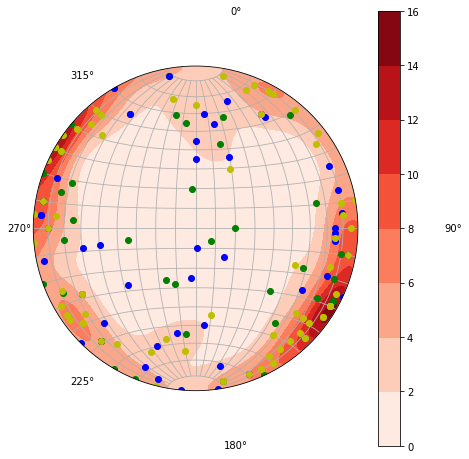

In [8]:
figures = plt.figure(figsize =(16,8))
ax = figures.add_subplot(121,projection = 'stereonet')
ax.pole(strikes_green,dips_green,c='g',label='Pole of the planes')
ax.pole(strikes_blue,dips_blue,c='b',label='Pole of the planes')
ax.pole(strikes_yellow,dips_yellow,c='y',label='Pole of the planes')
cax = ax.density_contourf(strikes_combined,dips_combined,measurement='poles',cmap='Reds')
ax.grid(True)
figures.colorbar(cax)

In [9]:
strikes_green,strikes_blue,strikes_yellow,dips_green,dips_blue,dips_yellow=split_data((strikes_one+strikes_two),(dips_one+dips_two),(persistances_one+persistances_two))

# Pillar one poles

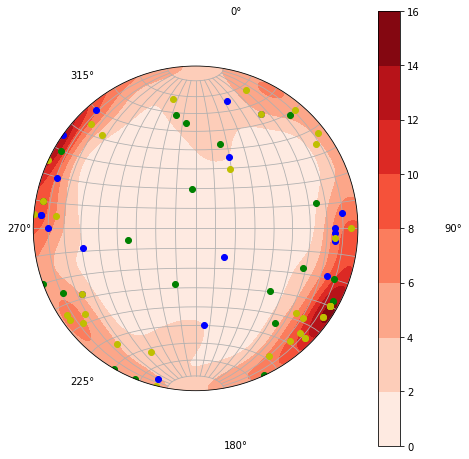

In [10]:
figures = plt.figure(figsize =(16,8))
ax = figures.add_subplot(121,projection = 'stereonet')
ax.pole(strikes_green,dips_green,c='g',label='Pole of the planes')
ax.pole(strikes_blue,dips_blue,c='b',label='Pole of the planes')
ax.pole(strikes_yellow,dips_yellow,c='y',label='Pole of the planes')
cax = ax.density_contourf(strikes_combined,dips_combined,measurement='poles',cmap='Reds')
ax.grid(True)
figures.colorbar(cax)

In [11]:
strikes_green,strikes_blue,strikes_yellow,dips_green,dips_blue,dips_yellow=split_data((strikes_three+strikes_four),(dips_three+dips_four),(persistances_three+persistances_four))

# Pillar two poles

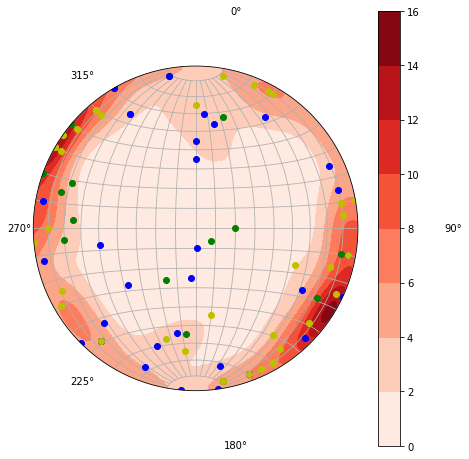

In [12]:
figures = plt.figure(figsize =(16,8))
ax = figures.add_subplot(121,projection = 'stereonet')
ax.pole(strikes_green,dips_green,c='g',label='Pole of the planes')
ax.pole(strikes_blue,dips_blue,c='b',label='Pole of the planes')
ax.pole(strikes_yellow,dips_yellow,c='y',label='Pole of the planes')
cax = ax.density_contourf(strikes_combined,dips_combined,measurement='poles',cmap='Reds')
ax.grid(True)
figures.colorbar(cax)

In [13]:
from matplotlib.widgets import Slider

In [14]:
c= [i for i in range(1,162)]
theta = dip_directions_combined
fig = plt.figure(figsize=(80, 8))



def give_array_to_plot_line(c,theta,persistances):
    num = 0
    l=0
    for i in c:
            l=l+1
            x1=0
            x2=persistances_combined[num]
            if x2<2:
                c ='g'
            elif x2>2 and x2<5:
                c= 'b'
            else:
                c='y'
            y1=x1*np.tan(theta)+l
            y2=x2*np.tan(theta)+l
            array=[[x1,x2],[y1,y2]]
            plt.plot(array[0],array[1], c=c)
            num+=1
    plt.show()

<Figure size 5760x576 with 0 Axes>

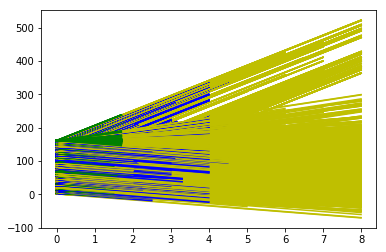

In [15]:

give_array_to_plot_line(c,theta,persistances_combined)


In [16]:
g=0
b=0
y=0
for i in persistances_combined:
    if i<2:
        g+=1
    elif i>2 and i<5:
        b+=1
    else:
        y+=1
t = g+b+y
print('less than 2m:   ',g/t*100,"%","\n2 to 5m:        ",b/t*100,'%','\nmore than five: ',y/t*100,'%')

less than 2m:    22.981366459627328 % 
2 to 5m:         31.05590062111801 % 
more than five:  45.962732919254655 %
